In [26]:
import numpy as np
import pylab as pl
import statsmodels.formula.api as sm
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [27]:
def linefunc(x, a=1,b=0):
    y = a * x + b
    yerr = np.random.randn(len(x)) * np.sqrt(y.mean())/3 # add some noice(change the mean and std of the y)
    return y + yerr

In [28]:
x = np.random.rand(20)*10 #rand -->0 ~ 1
ln = linefunc(x, 1.5, 10) 

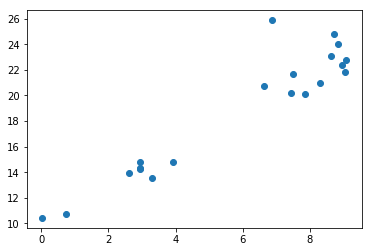

In [29]:
pl.scatter(x, ln)

In [30]:
df_ = pd.DataFrame({'y':ln, 'x':x, 'x2':x*x})

In [31]:
lm = sm.ols('y ~ x', data = df_).fit()

In [32]:
lm.params

Intercept    10.003740
x             1.493437
dtype: float64

In [33]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     144.1
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           5.02e-10
Time:                        19:38:22   Log-Likelihood:                -37.462
No. Observations:                  20   AIC:                             78.92
Df Residuals:                      18   BIC:                             80.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0037      0.818     12.225      0.000       8.285      11.723
x              1.4934      0.124     12.004      0.000       1.232       1.755
==============================================================================
Omnibus:                       24.434   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.603
Skew:                           2.093   Prob(JB):                     6.83e-09
Kurtosis:                       8.254   Cond. No.                         14.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
qm = sm.ols('y ~ x + x2', data = df_).fit()

In [35]:
qm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     69.70
Date:                Thu, 19 Oct 2017   Prob (F-statistic):           6.42e-09
Time:                        19:38:22   Log-Likelihood:                -37.248
No. Observations:                  20   AIC:                             80.50
Df Residuals:                      17   BIC:                             83.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4057      1.291      7.285      0.000       6.682      12.130
x              1.8611      0.619      3.004      0.008       0.554       3.168
x2            -0.0360      0.059     -0.606      0.552      -0.161       0.089
==============================================================================
Omnibus:                       21.309   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.134
Skew:                           1.903   Prob(JB):                     7.78e-07
Kurtosis:                       7.390   Cond. No.                         200.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
lm.llf,qm.llf

(-37.461706847791611, -37.247778985204192)

In [37]:
print (-2 * (lm.llf - qm.llf)) #stats < 3.84, cannot reject Ho

0.427855725175


In [38]:
qm.compare_lr_test(lm) # stats = 0.42, p-value = 0.51, Ho: overfitting exist, and the simpler model is better,
                       # since p value > 0.05, we cannot reject Ho

(0.42785572517483672, 0.51304299126698005, 1.0)

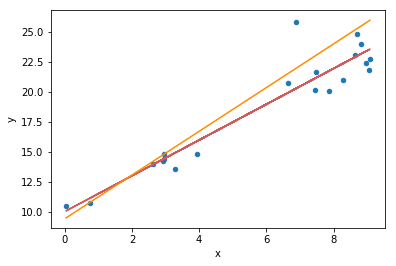

In [48]:
ax = df_.plot(x = 'x', y ='y', kind='scatter')
ax.plot(df_.x,lm.fittedvalues, color='IndianRed')
ax.plot(np.linspace(x.min(),x.max(),100), 
        np.linspace(x.min(),x.max(),100) * qm.params[2] + 
        np.linspace(x.min(),x.max(),100) * qm.params[1] +
        qm.params[0], color='DarkOrange')

In [55]:
df1_ = df_.sort_values(by= 'x')

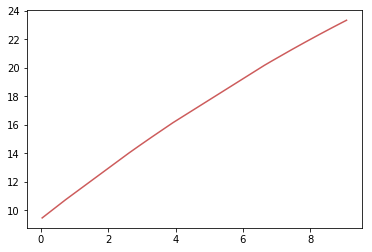

In [54]:
pl.plot(df1_.x, qm.predict(df1_),color = 'IndianRed')